<a href="https://colab.research.google.com/github/drsivambbs/two-sample-t-test-analysis/blob/main/T_test_for_2_Independent_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter data for Group 1 (comma-separated):
Group 1 data: 191,38,8
Enter data for Group 2 (comma-separated):
Group 2 data: 199,12,24
Enter name for Group 1: Class A
Enter name for Group 2: Class B


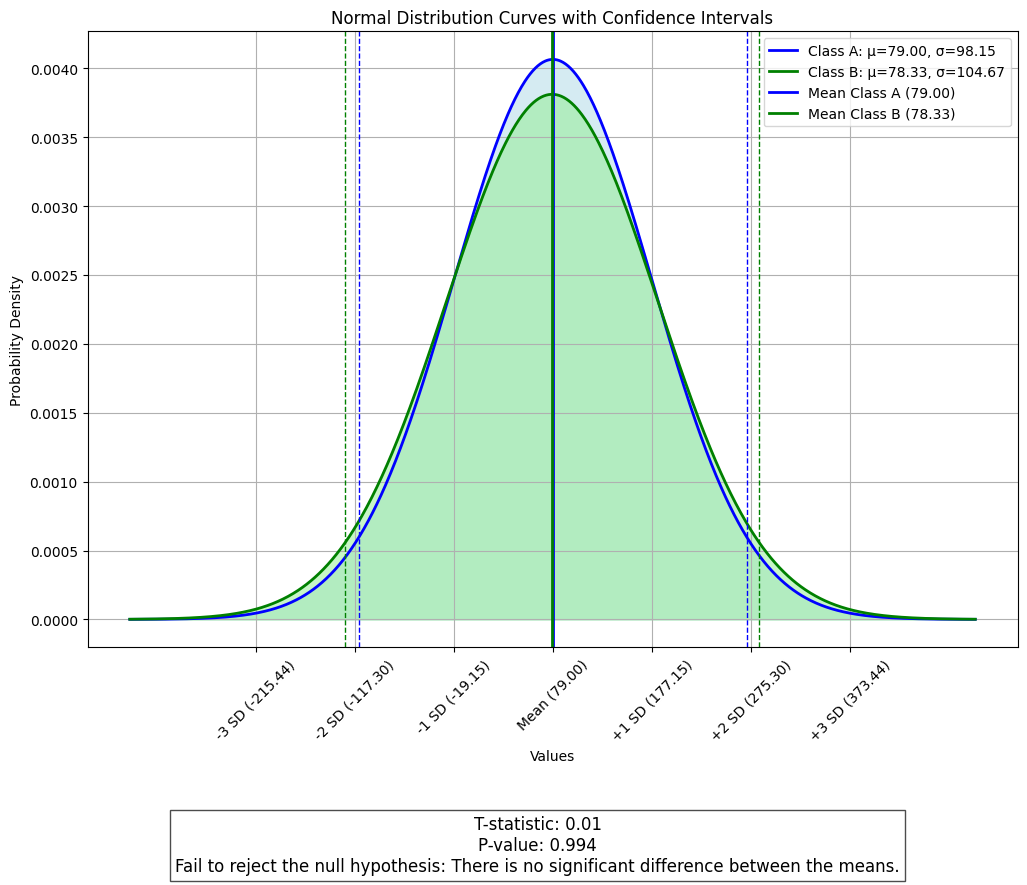

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to get input from user and convert it into a list of floats
def get_input(prompt):
    return list(map(float, input(prompt).strip().split(',')))
a
# Get input from the user
print("Enter data for Group 1 (mean1,sd1,n1):")
group1 = get_input("Group 1 data: ")
print("Enter data for Group 2 (mean2,sd2,n2):")
group2 = get_input("Group 2 data: ")

# Get group names from the user
group1_name = input("Enter name for Group 1: ").strip()
group2_name = input("Enter name for Group 2: ").strip()

# Calculate means and standard deviations
mean1 = np.mean(group1)
mean2 = np.mean(group2)
std1 = np.std(group1, ddof=1)  # Sample standard deviation
std2 = np.std(group2, ddof=1)

# Define the range for x values
x = np.linspace(min(mean1, mean2) - 4*max(std1, std2), max(mean1, mean2) + 4*max(std1, std2), 1000)

# Compute the normal distribution curves
pdf1 = stats.norm.pdf(x, mean1, std1)
pdf2 = stats.norm.pdf(x, mean2, std2)

# Confidence intervals (95%)
ci1_low = mean1 - 1.96 * std1
ci1_high = mean1 + 1.96 * std1
ci2_low = mean2 - 1.96 * std2
ci2_high = mean2 + 1.96 * std2

# Perform the two-sample t-test
analysis = stats.ttest_ind(group1, group2)
t_statistic, p_value = analysis

# Plotting the normal distribution curves
plt.figure(figsize=(12, 8))
plt.plot(x, pdf1, label=f'{group1_name}: μ={mean1:.2f}, σ={std1:.2f}', color='blue', linewidth=2)
plt.plot(x, pdf2, label=f'{group2_name}: μ={mean2:.2f}, σ={std2:.2f}', color='green', linewidth=2)

# Shade the area under the curves
plt.fill_between(x, pdf1, color='lightblue', alpha=0.5)
plt.fill_between(x, pdf2, color='lightgreen', alpha=0.5)

# Add mean lines as thick lines
plt.axvline(x=mean1, color='blue', linestyle='-', linewidth=2, label=f'Mean {group1_name} ({mean1:.2f})')
plt.axvline(x=mean2, color='green', linestyle='-', linewidth=2, label=f'Mean {group2_name} ({mean2:.2f})')

# Add confidence intervals as dotted lines
plt.axvline(x=ci1_low, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=ci1_high, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=ci2_low, color='green', linestyle='--', linewidth=1)
plt.axvline(x=ci2_high, color='green', linestyle='--', linewidth=1)

# Set custom x-axis ticks
ticks = [mean1 - 3*std1, mean1 - 2*std1, mean1 - std1, mean1, mean1 + std1, mean1 + 2*std1, mean1 + 3*std1]
labels = [f'-3 SD ({mean1 - 3*std1:.2f})', f'-2 SD ({mean1 - 2*std1:.2f})', f'-1 SD ({mean1 - std1:.2f})',
          f'Mean ({mean1:.2f})', f'+1 SD ({mean1 + std1:.2f})', f'+2 SD ({mean1 + 2*std1:.2f})',
          f'+3 SD ({mean1 + 3*std1:.2f})']

plt.xticks(ticks, labels, rotation=45)

# Plot customization
plt.title('Normal Distribution Curves with Confidence Intervals')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Inference text at the bottom of the plot
inference_text = (
    f'T-statistic: {t_statistic:.2f}\n'
    f'P-value: {p_value:.3f}\n'
    f'{"Reject the null hypothesis: There is a significant difference between the means." if p_value < 0.05 else "Fail to reject the null hypothesis: There is no significant difference between the means."}'
)

# Adding inference text to the bottom of the plot
plt.figtext(0.5, -0.1, inference_text, ha='center', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.show()
